In [1]:
import os
from pathlib import Path
from re import A
if '_cwd' not in locals():
    _cwd = os.getcwd()
    os.chdir(Path(_cwd)/'..')
    os.chdir(Path(os.getcwd())/'..') # ew

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# add automatic reloading of modules
%load_ext autoreload
%autoreload 2


Loading data and model

C:\Users\Zak\AppData\Local\Temp\ipykernel_1164\1452717047.py:76: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


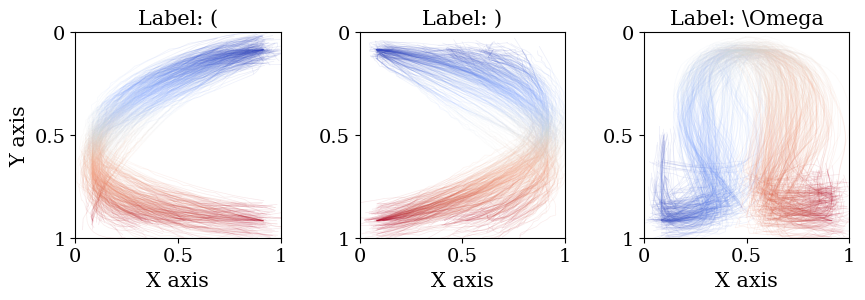

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.collections import LineCollection

font_fix = 4
plt.rcParams.update({
    "text.usetex": False,  
    "font.family": "serif",
    "font.size": 11 + font_fix,  # Match LaTeX font size
    "axes.titlesize": 11 + font_fix,
    "axes.labelsize": 11 + font_fix,
    "xtick.labelsize": 10 + font_fix,
    "ytick.labelsize": 10 + font_fix,
    "legend.fontsize": 10 + font_fix,
    "savefig.dpi": 300,  # High resolution for better LaTeX rendering
})

# Load dataset and labels
dataset = np.load('data/symbols/augmented_symbols.npy', allow_pickle=True)
labels = np.load('data/symbols/augmented_labels.npy', allow_pickle=True)

# Get unique labels
unique_labels = np.unique(labels)
num_labels = len(unique_labels)

# Set number of columns (one per unique label)
cols = num_labels
rows = 1  # Single row layout

fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, 3), constrained_layout=True)  # Keep square aspect

# Ensure axes is iterable even if there's only one label
if num_labels == 1:
    axes = [axes]

# 🚀 Fast batch plotting with LineCollection
for ax, label in zip(axes, unique_labels):
    indices = np.where(labels == label)[0]  
    samples = dataset[indices]  # Extract all samples for this label

    # ✅ Prepare data for LineCollection (Batch Processing)
    line_segments = []
    colors = []

    for sample in samples:
        norm = np.linspace(0, 1, len(sample) - 1)  # Normalize values from 0 to 1
        cmap_colors = cm.coolwarm(norm)  # Compute color gradient once

        # Create line segments from consecutive points
        segs = [np.array([sample[i], sample[i + 1]]) for i in range(len(sample) - 1)]
        line_segments.extend(segs)
        colors.extend(cmap_colors)  # Assign colors to each segment

    # 🚀 Create and add LineCollection (Much Faster)
    lc = LineCollection(line_segments, colors=colors, linewidth=0.5, alpha=0.1)
    ax.add_collection(lc)

    # ✅ Force axis range and ticks
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xticks([-0.1, 0.5, 1.1])
    ax.set_yticks([-0.1, 0.5, 1.1])
    ax.set_xticklabels(["0", "0.5", "1"])
    ax.set_yticklabels(["0", "0.5", "1"])

    ax.set_title(f"Label: {label}")
    ax.set_xlabel("X axis")
    if ax == axes[0]:  # Set Y label only on the first axis
        ax.set_ylabel("Y axis")

    ax.invert_yaxis()  # Reverse the Y-axis
    ax.set_aspect("equal")  # ✅ True square aspect ratio

# ✅ Trim whitespace & save
plt.tight_layout()
plt.show()
